- Load heart disease dataset in a pandas DataFrame.
- Remove outliers using Z score (remove anything with Z score > 3 or Z score < -3 or IQR.
- Convert text columns to numbers using label encoding and one hot encoding.
- Apply scaling to the dataset.
- Build a classification model using Support Vector Machine (SVM).
  - Use standalone SVM and Bagging model to compare performance.
- Build a classification model using Decision Tree Classifier.
  - Use standalone Decision Tree and Bagging model to compare performance.
- Compare the performance of SVM and Decision Tree Classifier.
  - Determine when Bagging makes the most sense and why.
  - Research when Bagging is most effective using online resources.
 best.

In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('heart.csv')

In [95]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [96]:
df.shape

(918, 12)

## Outlier Detection

Text(0.5, 1.0, 'Resting BP outlier')

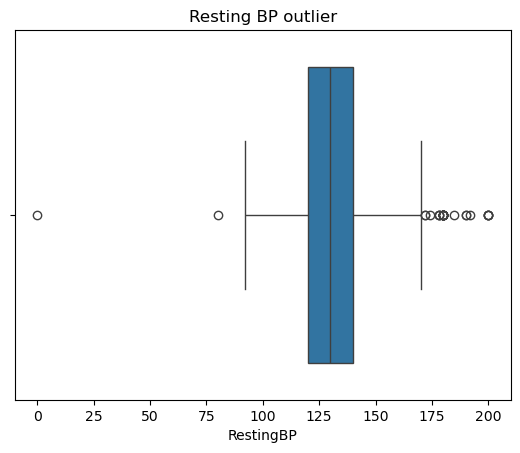

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = df['RestingBP'])
plt.title('Resting BP outlier')

Text(0.5, 1.0, 'Cholestrol outlier')

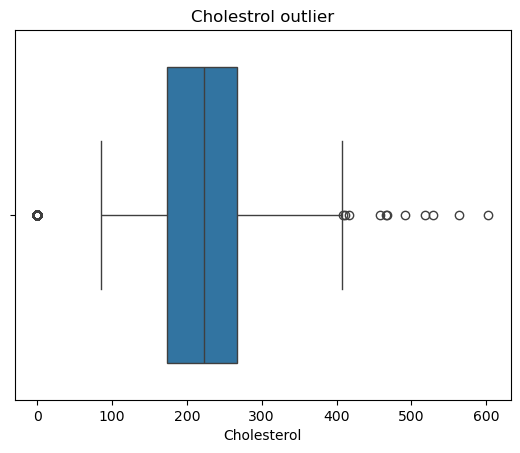

In [98]:
sns.boxplot(x = df['Cholesterol'])
plt.title('Cholestrol outlier')

In [99]:
Q1 = df[['RestingBP', 'Cholesterol']].quantile(0.25)
Q3 = df[['RestingBP', 'Cholesterol']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RestingBP      20.00
Cholesterol    93.75
dtype: float64


In [100]:
columns_to_filter = ['RestingBP', 'Cholesterol']
filter_condition = ~((df[columns_to_filter] < (Q1 - 1.5 * IQR)) | (df[columns_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[filter_condition]

In [101]:
df.shape

(715, 12)

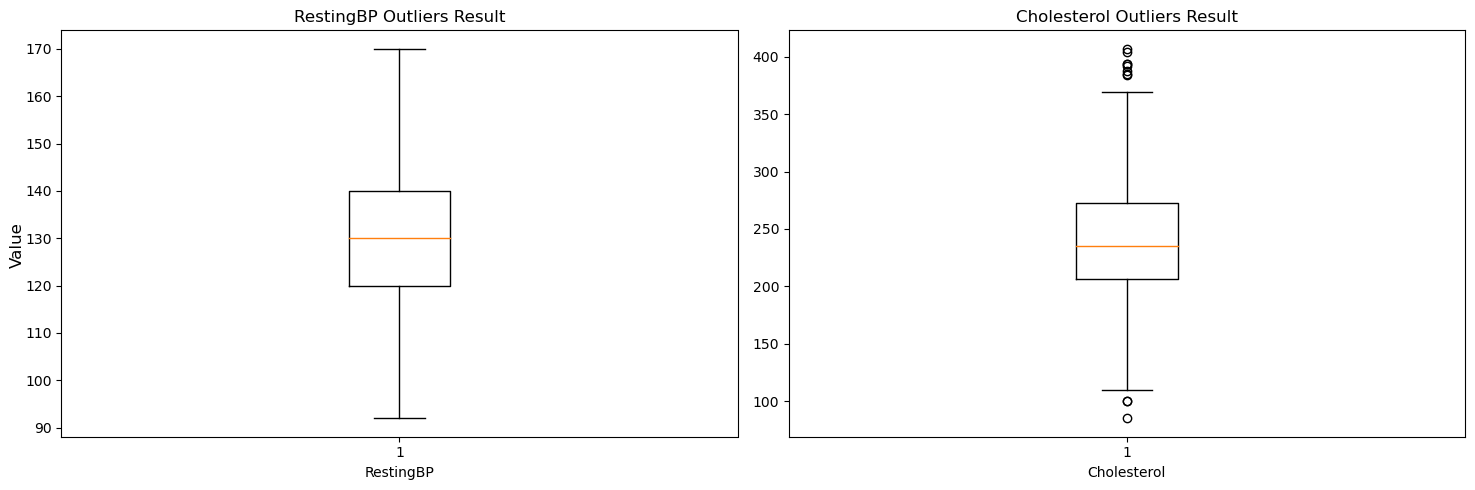

In [102]:
# Define the data and titles
columns = ['RestingBP', 'Cholesterol']
titles = ['RestingBP Outliers Result', 'Cholesterol Outliers Result']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))  # 1 row, 2 columns

# Loop through each column and plot the boxplot in a separate subplot
for i, col in enumerate(columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)

# Add a common y-label
fig.supylabel('Value')

# Display the plots
plt.tight_layout()  # Adjusts the subplot layout to avoid overlapping
plt.show()

In [103]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Removing Categorical Columns

In [104]:
df_dummy = df.drop(['Age','RestingBP', 'Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease'], axis = 1)
df_dummy.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [105]:
dummy_cols = pd.get_dummies(df_dummy,drop_first=True)
dummy_cols.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,True,True,False,False,True,False,False,False,True
1,False,False,True,False,True,False,False,True,False
2,True,True,False,False,False,True,False,False,True
3,False,False,False,False,True,False,True,True,False
4,True,False,True,False,True,False,False,False,True


In [106]:
df = df.drop(['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'], axis = 1)

In [107]:
df = pd.concat([df, dummy_cols], axis = 1)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [108]:
df.shape

(715, 16)

## Scaling

In [112]:
x = df.drop(['HeartDisease'], axis = 1)

In [113]:
y = df['HeartDisease']

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.34377575,  0.5392688 ,  0.96212351, ..., -0.78590525,
        -0.94421099,  1.05315932],
       [-0.40047947,  1.83685317, -1.18031186, ..., -0.78590525,
         1.05908532, -0.94952396],
       [-1.65820784, -0.10952338,  0.84419129, ..., -0.78590525,
        -0.94421099,  1.05315932],
       ...,
       [ 0.4380061 , -0.10952338, -2.14342501, ...,  1.27241802,
         1.05908532, -0.94952396],
       [ 0.4380061 , -0.10952338, -0.07961112, ..., -0.78590525,
         1.05908532, -0.94952396],
       [-1.55339714,  0.40951037, -1.27858872, ..., -0.78590525,
        -0.94421099,  1.05315932]])

In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25)

### 1. Stand-alone SVM

In [200]:
from sklearn.svm import SVC

In [201]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
model_svm.score(x_test, y_test)

0.8659217877094972

## 2. SVM + Bagging

In [202]:
from sklearn.ensemble import BaggingClassifier

In [203]:
svm_bagmodel = BaggingClassifier(
    estimator= SVC(),
    n_estimators = 60,
    max_samples = 0.80,
    oob_score = True
)

In [204]:
svm_bagmodel.fit(x_train, y_train)
svm_bagmodel.oob_score_ #out of bag score

0.8582089552238806

In [205]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_bagmodel, x_scaled, y, cv = 4)
scores

array([0.8603352 , 0.93296089, 0.80446927, 0.76404494])

In [206]:
scores.mean()

0.8404525767371791

## 3. Stand-along Decision tree

In [207]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
model_tree.score(x_test, y_test)

0.7821229050279329

## 4. Decision Tree + Bagging

In [209]:
decisionTree_bagmodel = BaggingClassifier(
    estimator= DecisionTreeClassifier(),
    n_estimators = 60,
    max_samples = 0.80,
    oob_score = True
)

In [210]:
decisionTree_bagmodel.fit(x_train, y_train)
decisionTree_bagmodel.oob_score_

0.832089552238806

In [211]:
decisionTree_scores = cross_val_score(decisionTree_bagmodel, x_scaled, y, cv = 4)
decisionTree_scores

array([0.83240223, 0.93854749, 0.82122905, 0.75842697])

In [212]:
decisionTree_scores.mean()

0.8376514343104638

### We saw that bagging did not make much sense in case of svm, but in case of decision tree bagging imporved the accuracy. Bagging is effective when we have high variance and instable model such as decision tree.

In [218]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), x_scaled, y, cv=5)
scores.mean()

0.8545454545454545

### DecisionTree + Bagging = Random Forest. Random forest gave even a better performance with 85.4% as score. Underneath it used bagging where it sampled not only data rows but also the columns (or features)